In [15]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [24]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## 연습

In [ ]:
a = tf.add(3,5)
print(a)

In [ ]:
a = tf.add(3,5)
sess = tf.Session()
print(sess.run(a))

In [ ]:
sess.close()

In [ ]:
a = tf.add(3,5)
with tf.Session() as sess:
    print(sess.run(a))

In [22]:
x = 2
y = 3
op1 = tf.add(x,y)
op2 = tf.multiply(x,y)
useless = tf.multiply(x,op1)
op3 = tf.pow(op2,op1) #제곱연산 pow

In [19]:
with tf.Session() as sess:
    op3 = sess.run(op3)
    print(op3)

7776


2022-06-28 09:31:59.673166: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 09:31:59.673194: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-28 09:31:59.674641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [23]:
with tf.Session() as sess:
    op3, useless = sess.run([op3,useless])
    print(op3,useless)

7776 10


2022-06-28 09:35:36.315577: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 09:35:36.315607: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-28 09:35:36.317399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## 실습

In [25]:
x_data = datasets.load_boston().data[:, 12] # 주변 이웃 중 하위 계층의 비율
y_data = datasets.load_boston().target # 집의 가격 (in $1,000s)
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

/Users/sanghyun/miniforge3/envs/yeardream/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [26]:
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b  # 모델

In [27]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data)) #MSE
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

In [28]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  ## tf.Variables 초기화

    for step in range(10000):
        sess.run(train) ## 실제로 Gradient Descent가 실행되는 코드
        if step % 1000 == 0:
            print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()

    w_out, b_out = sess.run([w, b]) 

2022-06-28 10:01:38.495179: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 10:01:38.495209: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-28 10:01:38.498926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-28 10:01:38.936511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-28 10:01:39.530979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-28 10:01:39.53

Step 0: w [0.23570845] b [0.8937591]
loss 458.1102294921875

Step 1000: w [0.29756162] b [13.773215]
loss 142.64642333984375

Step 2000: w [-0.1786706] b [21.7055]
loss 78.30213928222656

Step 3000: w [-0.47312027] b [26.609951]
loss 53.704715728759766

Step 4000: w [-0.6551717] b [29.64226]
loss 44.30186462402344

Step 5000: w [-0.7677319] b [31.517101]
loss 40.707366943359375

Step 6000: w [-0.83732444] b [32.676258]
loss 39.33331298828125

Step 7000: w [-0.8803534] b [33.39296]
loss 38.808040618896484

Step 8000: w [-0.9069573] b [33.836086]
loss 38.607234954833984

Step 9000: w [-0.9234054] b [34.11005]
loss 38.53047561645508



2022-06-28 10:01:57.321858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


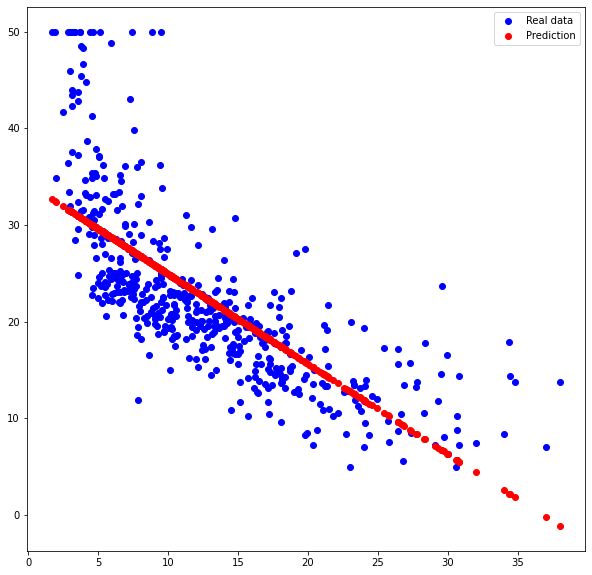

In [29]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()

### with Neural Network

In [30]:
x_data = datasets.load_boston().data[:, 12] # 주변 이웃 중 하위 계층의 비율
y_data = datasets.load_boston().target # 집의 가격 (in $1,000s)
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

/Users/sanghyun/miniforge3/envs/yeardream/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [41]:
_x_data = tf.reshape(x_data, [len(x_data),1])
_y_data = tf.reshape(y_data, [len(y_data),1])

W1 = tf.Variable(tf.random_normal([1,5], dtype=tf.float64))
W2 = tf.Variable(tf.random_normal([5,10], dtype=tf.float64))
W_out = tf.Variable(tf.random_normal([10,1],dtype=tf.float64))

hidden1 = tf.nn.elu(tf.matmul(_x_data, W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2))
output = tf.matmul(hidden2, W_out)

In [42]:
loss = tf.losses.mean_squared_error(output, _y_data)
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

In [43]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  ## tf.Variables 초기화

    for step in range(50000):
        sess.run(train) ## 실제로 Gradient Descent가 실행되는 코드
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))

    output = sess.run(output) 

2022-06-28 11:21:12.630333: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 11:21:12.630364: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-28 11:21:12.639780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-28 11:21:12.668396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-28 11:21:12.876905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Step 0 || Loss : 1052.6171875
Step 5000 || Loss : 27.78693962097168
Step 10000 || Loss : 26.241439819335938
Step 15000 || Loss : 26.182140350341797
Step 20000 || Loss : 26.15680694580078
Step 25000 || Loss : 26.10406494140625
Step 30000 || Loss : 26.093488693237305
Step 35000 || Loss : 26.08152198791504
Step 40000 || Loss : 26.07479476928711
Step 45000 || Loss : 26.07010269165039


2022-06-28 11:22:29.019665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


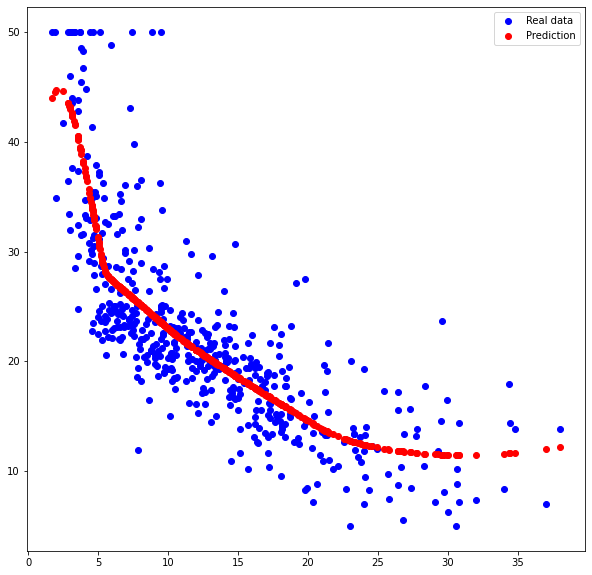

In [44]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()

## 실습2

In [1]:
from tensorflow.keras import datasets # MNIST Data는 Tensorflow 2.x를 통해 가져올 수 있음

(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

In [2]:
print(train_data.shape) # # of training data == 60000, each data = 28px * 28px
print(test_data.shape) # # of test data == 10000

(60000, 28, 28)
(10000, 28, 28)


In [7]:
train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
import pandas as pd


pd.DataFrame(train_data[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


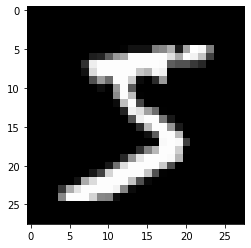

In [6]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0], cmap='gray') # 60000장의 train data 중 첫번째 data

In [8]:
# 각 이미지(28px * 28px)는 0~255 사이의 숫자로 이루어져 있음

print(train_data.min())
print(train_data.max()) 

0
255


In [9]:
train_data.shape

(60000, 28, 28)

In [10]:
# 원핫인코딩을 위해서 행을 한줄로 만들어줌
# 각 이미지를 [28행 x 28열]에서 [1행 x 784열]로 펼줌
# 각 이미지 내의 pixel 값을 [0~255]에서 [0~1]로 바꿔줌

train_data = train_data.reshape(60000, 28*28) / 255.0 #255 = tarin_data.max() 값
test_data = test_data.reshape(10000, 784) / 255.0

In [11]:
train_data.shape

(60000, 784)

### One-hot encoding

In [12]:
train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
# 각 label을 integer value에서 one-hot vector로 변경해줍니다. (Tensorflow 2.x 활용)

from tensorflow.keras import utils

train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

In [15]:
train_label.shape

(60000, 10)

In [16]:
import pandas as pd

pd.DataFrame(train_label).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
train_label[0:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [20]:
# import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information
tf.logging.set_verbosity(tf.logging.ERROR)

Instructions for updating:
non-resource variables are not supported in the long term


In [21]:
# 데이터가 흘러들어올 접시(placeholder) 만들기 

X = tf.placeholder(tf.float32, [None, 28*28]) # [# of batch data, # of features(columns) == 총 784개의 열] _ train data
Y = tf.placeholder(tf.float32, [None, 10]) # 0~9 == 총 10개의 열 _ target data

In [22]:
# 모든 Parameter Theta는 Variable로 선언

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
# 784 - x data의 열의 수
# 256 - node 수
L1 = tf.nn.relu(tf.matmul(X, W1))

In [23]:
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

In [24]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
# 256,10 에서 10은 y data의 열의 수
model = tf.matmul(L2, W3) # 마지막 층도 행렬곱까지만 진행
# model = tf.nn.softmax(tf.matmul(L2, W3)) #softmax를 직접 해주는 방법

#### 3. Set the criterion

In [25]:
# cost = tf.losses.mean_squared_error(Y, model) # for Regression

cost = tf.losses.softmax_cross_entropy(Y, model) # for Classification, "cross-entropy" after "softmax", Regression와의 차이점

optimizer = tf.train.AdamOptimizer(0.001).minimize(cost) # Select optimizer & connect with cost function (recommended start : "Adam")


# optimizer = tf.train.AdamOptimizer(0.001)
# train = optimizer.minimize(cost) 굳이 2줄로 쓸 필요 없어서 위와 같이 작성

#### 4. Train the model

In [26]:
sess = tf.Session()

init = tf.global_variables_initializer() # Initialize all global variables (Parameter Theta)

sess.run(init)

Metal device set to: AMD Radeon Pro 5500M

systemMemory: 16.00 GB
maxCacheSize: 1.99 GB



In [27]:
sess.run(W1)

array([[-0.01177496,  0.00761979, -0.01678352, ...,  0.00526533,
         0.00664157, -0.01914531],
       [-0.01341853, -0.00857946, -0.00062942, ..., -0.01152344,
         0.00164494, -0.00394595],
       [-0.00012682, -0.01209317, -0.01071976, ...,  0.00190039,
         0.01748891, -0.00087505],
       ...,
       [ 0.02826852,  0.00576   , -0.00131101, ..., -0.00932665,
         0.00643453, -0.00413114],
       [ 0.02138836,  0.00922877, -0.00199737, ...,  0.00208037,
         0.02073   ,  0.0007449 ],
       [-0.01181618, -0.01512748,  0.01851381, ...,  0.00187108,
         0.01339767, -0.01995611]], dtype=float32)

In [28]:
train_data.shape

(60000, 784)

In [29]:
# Gradient descent를 적용하기 전까지 한번에 밀어넣는 데이터의 수 지정 (Batch size == 하나의 데이터 덩어리 내 데이터 수)

batch_size = 100
total_batch = int(len(train_data) / batch_size)
print(total_batch)

600


In [ ]:
# import tqdm 
# for epoch in tqdm.notebook.tqdm(range(15)):

In [30]:
for epoch in range(15): #6만장의 trian data를 15번 밀어넣겠다
    
    
    total_cost = 0 # 매 epoch 마다의 평균 에러 값 계산을 위해 활용됩니다.
    batch_idx = 0 # 매 batch 마다 꺼낼 데이터의 시작 index 값 지정을 위해 활용됩니다.
    
    for i in range(total_batch): # iterate over # of batches #여기 기준으로 100번 밀어넣고 GD한번
        
        # Training data(60000장)에서 batch_size(100개) 만큼 순서대로 꺼내어 학습에 활용해줍니다.
        batch_x = train_data[ batch_idx : batch_idx + batch_size ]
        batch_y = train_label[ batch_idx : batch_idx + batch_size ]

        # 첫 바퀴 기준
        # batch_x = train_data[ 0 : 0 + 100 ]
        # batch_y = train_label[ 0 : 0 + 100 ]
        # 이후 100씩 증가됨
        
        sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y}) # 먹여줄(feed) 딕셔너리(dict)
        # optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
        
        # 이번 batch를 기준으로 계산이 끝난 Cross-entropy 값을 total_cost에 더해줍니다. (epoch 종료 후 평균을 냅니다.)
        batch_cost = sess.run(cost, feed_dict={X: batch_x, Y: batch_y})
        # cost = tf.losses.softmax_cross_entropy(Y, model)
        total_cost = total_cost + batch_cost
        
        # 다음 for loop에서 꺼낼 데이터의 시작 index 번호를 batch_size(100) 만큼 증가시킵니다.
        batch_idx += batch_size
        # batch_idx += 100
    
    
    # (이번 epoch가 종료되었을 시점의) training data 기준 Cross-entropy 값을 계산합니다.
    training_cost = total_cost / total_batch
    
    # (이번 epoch가 종료되었을 시점의) test data 기준 Cross-entropy 값을 계산합니다.
    test_cost = sess.run(cost, feed_dict={X: test_data, Y: test_label}) 
    
    
    print('Epoch: {}'.format(epoch + 1), 
          '|| Avg. Training cost = {:.3f}'.format(training_cost), 
          '|| Current Test cost = {:.3f}'.format(test_cost))

print('Learning process is completed!')

Epoch: 1 || Avg. Training cost = 0.381 || Current Test cost = 0.192
Epoch: 2 || Avg. Training cost = 0.136 || Current Test cost = 0.120
Epoch: 3 || Avg. Training cost = 0.085 || Current Test cost = 0.127
Epoch: 4 || Avg. Training cost = 0.057 || Current Test cost = 0.117
Epoch: 5 || Avg. Training cost = 0.039 || Current Test cost = 0.118
Epoch: 6 || Avg. Training cost = 0.028 || Current Test cost = 0.136
Epoch: 7 || Avg. Training cost = 0.020 || Current Test cost = 0.091
Epoch: 8 || Avg. Training cost = 0.016 || Current Test cost = 0.103
Epoch: 9 || Avg. Training cost = 0.012 || Current Test cost = 0.095
Epoch: 10 || Avg. Training cost = 0.009 || Current Test cost = 0.094
Epoch: 11 || Avg. Training cost = 0.008 || Current Test cost = 0.092
Epoch: 12 || Avg. Training cost = 0.007 || Current Test cost = 0.087
Epoch: 13 || Avg. Training cost = 0.006 || Current Test cost = 0.106
Epoch: 14 || Avg. Training cost = 0.006 || Current Test cost = 0.113
Epoch: 15 || Avg. Training cost = 0.004 || 

#### 5. Test the model

In [31]:
# Test data에서 첫번째 행(1행 x 784열)을 꺼내는 코드입니다.
# (Scikit-learn의 첫번째 실습이었던 Linear-regression 실습에서 하나의 열을 꺼낼 때 행렬 형태로 꺼내던 방법을 떠올려보세요.)

test_data[0:1, :].shape 

(1, 784)

In [32]:
test_data[0 , : ].shape

(784,)

In [35]:
test_data[0 , : ].reshape(1, 784)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [34]:
test_data[0 , : ].reshape(1, 784).shape

(1, 784)

In [36]:
# 데이터 1건에 대하여 마지막 output layer의 출력값을 얻을 수 있습니다. (softmax 적용 전의 10개 숫자)

sess.run(model, feed_dict={X: test_data[0:1, :]}) 

array([[-14.880725  ,  -2.289477  ,  -9.201879  ,  -5.279657  ,
        -16.400732  , -11.417189  , -41.004997  ,  17.678217  ,
        -10.130165  ,   0.33595133]], dtype=float32)

In [38]:
# 데이터 1건에 대하여 마지막 output layer의 출력값을 얻을 수 있습니다. (softmax 적용 전의 10개 숫자)

prediction = sess.run(tf.nn.softmax(model), feed_dict={X: test_data[0:1, :]}) 
prediction

array([[7.24155487e-15, 2.12883156e-09, 2.11895909e-12, 1.07033986e-10,
        1.58380010e-15, 2.31220533e-13, 3.26741750e-26, 1.00000000e+00,
        8.37477548e-13, 2.94001374e-08]], dtype=float32)

In [39]:
# 데이터 1건에 대하여 마지막 output layer의 출력값을 얻을 수 있습니다. (softmax 적용 전의 10개 숫자)

pd.DataFrame(prediction)

,0,1,2,3,4,5,6,7,8,9
0,7.241555e-15,2.128832e-09,2.118959e-12,1.070340e-10,1.583800e-15,2.312205e-13,3.267417e-26,1.0,8.374775e-13,2.940014e-08


In [42]:
import numpy as np

data = np.arange(12).reshape(3,4)
data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [44]:
np.argmax(data, axis=0) #열 기준으로 index를 뽑아줌

array([2, 2, 2, 2])

In [43]:
np.argmax(data)

11

In [46]:
# 위 10개의 숫자 중 가장 큰 값의 index 번호를 얻어냅니다 (np.argmax와 동일)

sess.run(tf.argmax(model, axis=1), feed_dict={X: test_data[0:1, :]}) # argmax 함수의 두번째 argument "1"은 행 방향을 의미합니다.

array([7])

In [45]:
# 실제 정답인 test label 중 첫번째 행의 가장 큰 값의 index 번호를 얻어내어 비교함으로써 모델이 맞췄는지 확인이 가능합니다. 

sess.run(tf.argmax(Y, 1), feed_dict={Y: test_label[0:1, :]})

array([7])

#### 정확도 계산 (tf.argmax / tf.equal / tf.cast / tf.reduce_mean 활용)

In [47]:
# tf.argmax([0.1 0 0 0.7 0 0.2 0 0 0 0]) -> 3 (가장 큰 값의 index를 return)

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1)) # model : 예측값, Y : 실제 정답
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) # 자료형 변환(type-"cast") 후, 차원을 줄이면서(reduce) 평균(mean) 계산

In [48]:
# 10,000건의 Test data 전체에 대해 모델의 정확도를 계산합니다.

print('정확도 :', sess.run(accuracy,
                        feed_dict={X: test_data,
                                   Y: test_label}))

정확도 : 0.9784


In [53]:
prediction = sess.run(tf.arg_max(model, 1), feed_dict={X:test_data})
pd.DataFrame(prediction)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [49]:
# 모델 예측 결과값

predicted_labels = sess.run(tf.argmax(model, 1), feed_dict={X: test_data, Y: test_label})
print(list(predicted_labels)[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [50]:
# 실제 정답 

import numpy as np
print(np.argmax(test_label, 1)[:10])

[7 2 1 0 4 1 4 9 5 9]


## Dropout

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information
tf.logging.set_verbosity(tf.logging.ERROR)

Instructions for updating:
non-resource variables are not supported in the long term


#### 1. Prepare the data

In [4]:
from tensorflow.keras import datasets, utils

(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

train_data = train_data.reshape(60000, 784) / 255.0
test_data = test_data.reshape(10000, 784) / 255.0

train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

#### 2. Build the model

In [5]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [7]:
# Dropout을 적용하며 layer마다 살려줄 node의 비율을 지정합니다.
# 이 때에도 placeholder를 사용해야 합니다.

keep_prob = tf.placeholder(tf.float32)

In [8]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

L1 = tf.nn.dropout(L1, keep_prob) # (Dropout을 적용할 layer, 살릴 비율)
# keep_prob = 살릴 비율. 0.8이면 80%
# placeholder를 쓰는 이유는 추후 train과 test 시점에서 바꿔줘야하기 때문

In [9]:
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

L2 = tf.nn.dropout(L2, keep_prob) # Dropout을 적용할 layer & 살릴 비율

In [10]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

#### 3. Set the criterion

In [11]:
cost = tf.losses.softmax_cross_entropy(Y, model) 
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#### 4. Train the model

In [12]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Metal device set to: AMD Radeon Pro 5500M

systemMemory: 16.00 GB
maxCacheSize: 1.99 GB



In [13]:
batch_size = 100
total_batch = int(len(train_data) / batch_size)
print(total_batch)

600


In [14]:
for epoch in range(15):
    
    
    total_cost = 0
    batch_idx = 0
    
    for i in range(total_batch):
        
        batch_x = train_data[ batch_idx : batch_idx + batch_size ]
        batch_y = train_label[ batch_idx : batch_idx + batch_size ]
        
        sess.run(optimizer, feed_dict={X: batch_x, 
                                       Y: batch_y, 
                                       keep_prob: 0.8}) # 살릴 비율 지정, node 중 80%만 유지하고 20%를 train 시마다 off
        
        batch_cost = sess.run(cost, feed_dict={X: batch_x, 
                                               Y: batch_y, 
                                               keep_prob: 0.8}) # 살릴 비율 지정, node 중 80%만 유지하고 20%를 train 시마다 off
        total_cost = total_cost + batch_cost
        
        batch_idx += batch_size
    
    
    training_cost = total_cost / total_batch
    
    
    print('Epoch: {}'.format(epoch + 1), 
          '|| Avg. Training cost = {:.3f}'.format(training_cost))

print('Learning process is completed!')

Epoch: 1 || Avg. Training cost = 0.408
Epoch: 2 || Avg. Training cost = 0.141
Epoch: 3 || Avg. Training cost = 0.081
Epoch: 4 || Avg. Training cost = 0.049
Epoch: 5 || Avg. Training cost = 0.029
Epoch: 6 || Avg. Training cost = 0.018
Epoch: 7 || Avg. Training cost = 0.012
Epoch: 8 || Avg. Training cost = 0.012
Epoch: 9 || Avg. Training cost = 0.009
Epoch: 10 || Avg. Training cost = 0.006
Epoch: 11 || Avg. Training cost = 0.005
Epoch: 12 || Avg. Training cost = 0.004
Epoch: 13 || Avg. Training cost = 0.003
Epoch: 14 || Avg. Training cost = 0.002
Epoch: 15 || Avg. Training cost = 0.003
Learning process is completed!


#### 5. Test the model

In [15]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [16]:
print('정확도:', sess.run(accuracy,
                        feed_dict={X: test_data,
                                   Y: test_label,
                                   keep_prob: 1})) # 살릴 비율 지정, 정확도를 측정하는 Test 단계에서는 전체 Node를 살려줘야 합니다.
                                                   # 그렇기 때문에 100%를 살리는 1로 설정

정확도: 0.9758


#### + Appendix. Save the predicted values

In [17]:
# 모델의 예측값을 labels에 저장
labels = sess.run(tf.argmax(model, 1),
                  feed_dict={X: test_data,
                             Y: test_label,
                             keep_prob: 1}) 
print(labels)

[7 2 1 ... 4 5 6]
